In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Collection and Preprocessing

In [7]:
df = pd.read_csv("../dataset/heart.csv")

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Cleaning

In [9]:
df.isna().sum() # to check the missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

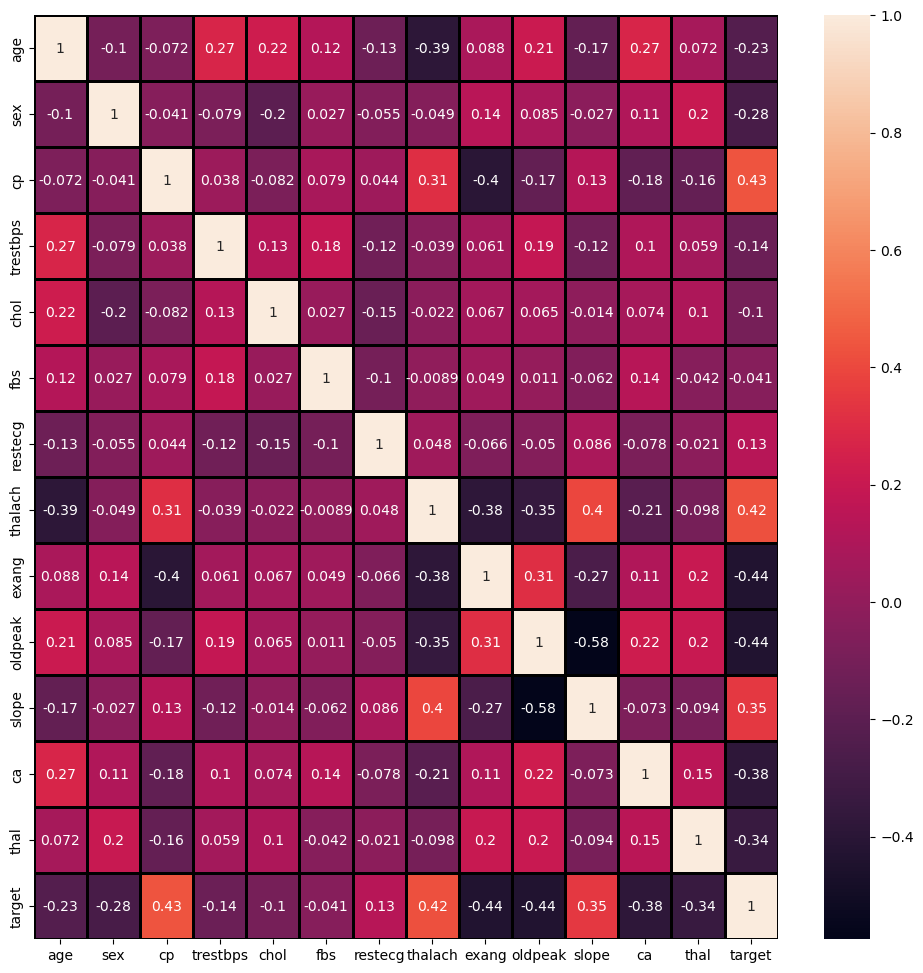

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linecolor='black',linewidths=1)

## Data Splitting

In [11]:
# Split the data into features and target variable
X = df.drop('target',axis=1)
y = df['target']

In [12]:
# Split Data into Training and Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.3,stratify = y)

## Feature Scaling

In [13]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler();
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# Model Training

In [14]:
# importing important Libraries
from sklearn.model_selection import cross_val_score

## Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\mahes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
## Checking Cross-validation Score
lr_cv_scores = cross_val_score(lr,X,y,cv=5)
print(lr_cv_scores)

[0.88292683 0.84878049 0.86341463 0.8195122  0.79512195]


c:\Users\mahes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mahes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [17]:
print("LogisticRegression Model CV Scroe: ",lr_cv_scores)
print("Mean Score: ",lr_cv_scores.mean())

LogisticRegression Model CV Scroe:  [0.88292683 0.84878049 0.86341463 0.8195122  0.79512195]
Mean Score:  0.8419512195121952


## Decision Tree Model

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
dt_cv_scores = cross_val_score(dt,X,y,cv=5)
print("Decision Tree Cross Validation Score: ",dt_cv_scores)
print("Mean Score: ",dt_cv_scores.mean())

Decision Tree Cross Validation Score:  [1.         1.         0.98536585 1.         1.        ]
Mean Score:  0.9970731707317073


## Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
rfc_cv_scores = cross_val_score(rfc,X,y,cv=5)
print("RandomForestClassifier CV Scroe: ",rfc_cv_scores)
print("Mean Score: ",rfc_cv_scores.mean())

RandomForestClassifier CV Scroe:  [1.         1.         1.         1.         0.98536585]
Mean Score:  0.9970731707317073


# Selecting a Desirable Model

In [22]:
# Importing important libraries
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

In [23]:
def run_model(model,X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):

  y_preds_test = model.predict(X_test)
  accuracy_test = accuracy_score(y_pred=y_preds_test,y_true=y_test)
  cr_test = classification_report(y_pred=y_preds_test,y_true=y_test)

  y_preds_train = model.predict(X_train)
  accuracy_train = accuracy_score(y_pred = y_preds_train, y_true = y_train)
  cr_train = classification_report(y_pred = y_preds_train, y_true = y_train)

  print("-------------------------------------------Train--------------------------------------------")
  print("Accuracy Score: ", accuracy_train)
  print("--------------------------------------------------------")
  print(cr_train)
  print("--------------------------------------------------------")
  ConfusionMatrixDisplay.from_predictions(y_pred=y_preds_train,y_true=y_train);
  print("--------------------------------------------------------------------------------------------")
  print()
  print("--------------------------------------------Test------------------------------------------------")
  print("Accuracy Score: ", accuracy_test)
  print("--------------------------------------------------------")
  print(cr_test)
  print("--------------------------------------------------------")
  ConfusionMatrixDisplay.from_predictions(y_pred=y_preds_test,y_true=y_test);

-------------------------------------------Train--------------------------------------------
Accuracy Score:  0.8661087866108786
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       349
           1       0.83      0.93      0.88       368

    accuracy                           0.87       717
   macro avg       0.87      0.86      0.86       717
weighted avg       0.87      0.87      0.87       717

--------------------------------------------------------
--------------------------------------------------------------------------------------------

--------------------------------------------Test------------------------------------------------
Accuracy Score:  0.8344155844155844
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       150
           1       0.80      0.91    

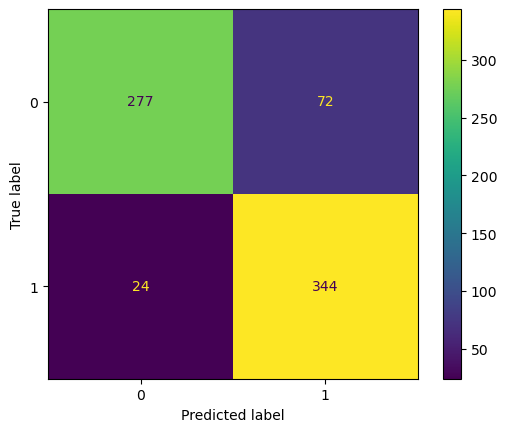

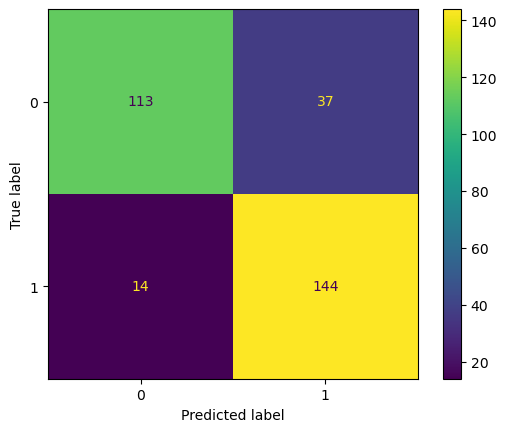

In [24]:
run_model(lr)

-------------------------------------------Train--------------------------------------------
Accuracy Score:  1.0
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       368

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717

--------------------------------------------------------
--------------------------------------------------------------------------------------------

--------------------------------------------Test------------------------------------------------
Accuracy Score:  0.9805194805194806
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       15

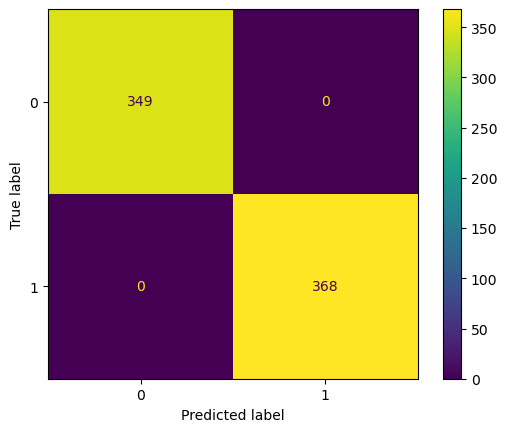

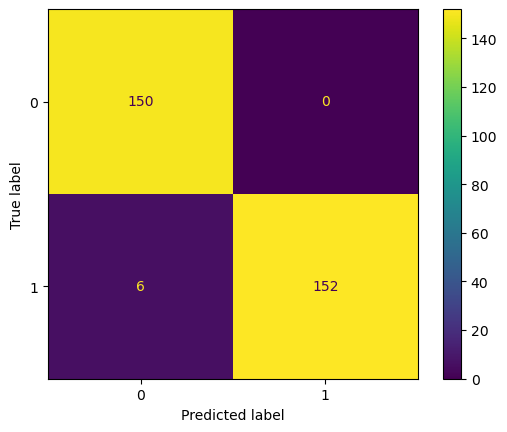

In [25]:
run_model(dt)

-------------------------------------------Train--------------------------------------------
Accuracy Score:  1.0
--------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       368

    accuracy                           1.00       717
   macro avg       1.00      1.00      1.00       717
weighted avg       1.00      1.00      1.00       717

--------------------------------------------------------
--------------------------------------------------------------------------------------------

--------------------------------------------Test------------------------------------------------
Accuracy Score:  0.9902597402597403
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       15

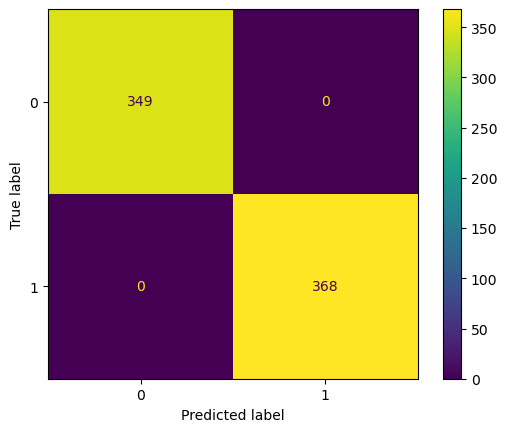

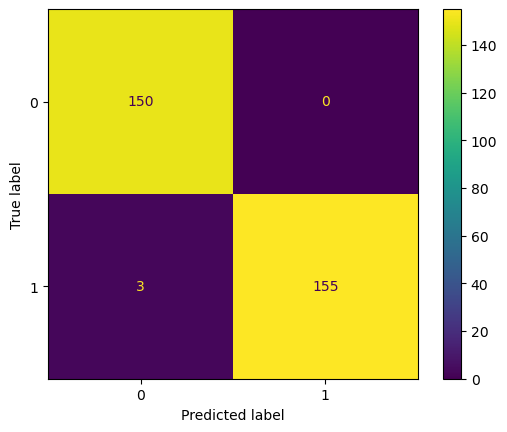

In [26]:
run_model(rfc)

# Hyperparameter Tuning

In [27]:
## Since RandomForestClassifier Worked pretty well in this case so we will choose it as our model

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [10,100,200,300],
    'max_depth': [5,10,15],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [i for i in range(1,6)]
}

grid_cv = GridSearchCV(model,param_grid=param_grid,cv=5,n_jobs=1)


In [29]:
grid_cv.fit(X_train,y_train)

In [ ]:
grid_cv.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
model = RandomForestClassifier(max_depth = 15, min_samples_leaf=1,min_samples_split=2,n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=15)

Accuracy Score:  0.9805194805194806
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

--------------------------------------------------------


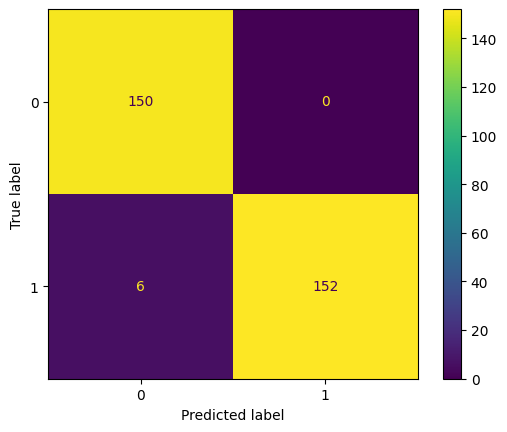

In [ ]:
run_model(model)

# Saving The Model

In [ ]:
import pickle

In [ ]:
filename = 'heart_model.sav'
pickle.dump(model, open(filename, 'wb'))